In [13]:
import random
import skimage as sk
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import util
import imageio


from matplotlib.pyplot import imshow
import numpy as np
import cv2
from scipy import ndimage

(201, 251, 3)


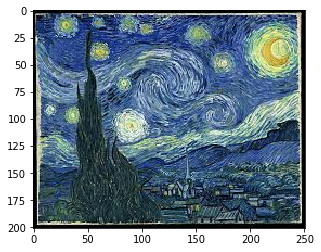

In [14]:
starry = cv2.imread('starry.jpeg')
starry_rgb = cv2.cvtColor(starry, cv2.COLOR_BGR2RGB)
print(starry_rgb.shape)
imshow(np.asarray(starry_rgb))

8.552880243246939


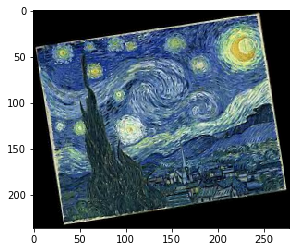

In [15]:
def random_rotation(image):
    # pick a random degree of rotation between 15% on the left and 15% on the right
    rand_degree = random.uniform(-15, 15)
    print(rand_degree)
    return sk.transform.rotate(image, rand_degree, True)

starry_rot = random_rotation(starry_rgb)
imshow(np.asarray(starry_rot))

-10.528821064430991


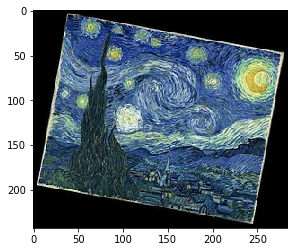

In [16]:
def random_rotation_ndimage(image):
    # pick a random degree of rotation between 15% on the left and 15% on the right
    rand_degree = random.uniform(-15, 15)
    print(rand_degree)
    return ndimage.rotate(image, rand_degree, reshape=True) # reshape = True
   
starry_rot = random_rotation_ndimage(starry_rgb)
imshow(np.asarray(starry_rot))

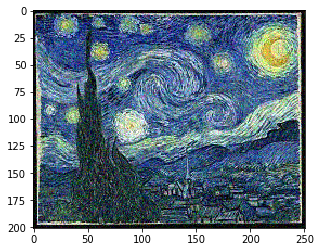

In [17]:
def random_noise(image):
    # add random noise to the image
    return sk.util.random_noise(image)

starry_noisy = random_noise(starry_rgb)
imshow(np.asarray(starry_noisy))

True


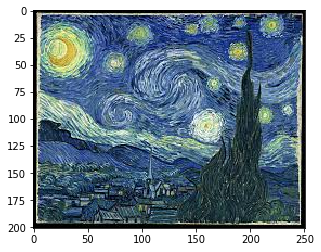

In [18]:
def horizontal_flip(image):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    print(np.all(np.fliplr(image) == image[:, ::-1]))
    # return image[:, ::-1]
    return np.fliplr(image)
    
starry_flipped = horizontal_flip(starry_rgb)
imshow(np.asarray(starry_flipped))

In [19]:
def scale_image(image):
    scaled_image = rescale(image, scale=2.5, mode='constant')
    return scaled_image
    
starry_scaled = scale_image(starry)
cv2.imshow("starry",np.asarray(starry))
cv2.imshow("starry_scaled", np.asarray(starry_scaled))
cv2.waitKey(0)
cv2.destroyAllWindows()

/home/shuvambosana/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/shuvambosana/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [20]:
def resize_image(image):
    print(image.shape)
    image_resized = cv2.resize(image, (int( image.shape[1] / 2), int(image.shape[0] / 2)))
    return image_resized
    
starry_resized = resize_image(starry)
print(starry_resized.shape)
cv2.imshow("starry",np.asarray(starry))
cv2.imshow("starry_resized",np.asarray(starry_resized))
cv2.waitKey(0)
cv2.destroyAllWindows()

(201, 251, 3)
(100, 125, 3)


In [21]:
def translate(image):
    num_rows, num_cols = image.shape[:2]
    print(num_rows,num_cols)
    translation_matrix = np.float32([ [1,0,70], [0,1,0] ])
    img_translation = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows))
    return img_translation

pikachu = cv2.imread("pikachu.jpg")
pikachu_moves = translate(pikachu)
cv2.imshow("pikachu",np.asarray(pikachu))
cv2.imshow("floating away!!!",np.asarray(pikachu_moves))
cv2.waitKey(0)
cv2.destroyAllWindows()

360 480


In [22]:

def get_crops(image):
    crops = []
    num_rows, num_cols = image.shape[:2]
    crop_left_up = image[0:(num_rows//2),0:(num_cols//2)]
    crop_right_up = image[num_rows//2:num_rows,0:num_cols//2]
    crop_right_down = image[num_rows//2:num_rows,num_cols//2:num_cols]
    crop_left_down = image[0:num_rows//2,num_cols//2:num_cols]
    crop_center = image[num_rows//2-num_rows//4: num_rows//2+num_rows//4, num_cols//2-num_cols//4: num_cols//2+num_cols//4]
    crops.append(crop_left_up)
    crops.append(crop_right_up)
    crops.append(crop_right_down)
    crops.append(crop_left_down)
    crops.append(crop_center)
    return crops

In [23]:
fruits = cv2.imread("fruits.jpg")
image_crops = []
image_crops = get_crops(fruits)
cv2.imshow("all fruits",np.asarray(fruits))
cv2.imshow("mango",np.asarray(image_crops[0]))
cv2.imshow("raspberry",np.asarray(image_crops[1]))
cv2.imshow("orange",np.asarray(image_crops[2]))
cv2.imshow("strawberry",np.asarray(image_crops[3]))
cv2.imshow("pineapple",np.asarray(image_crops[4]))
cv2.waitKey(0)
cv2.destroyAllWindows()